## CSE307 Project (Ex 6.11 C)

The exercise 4.6 gives that for a family of convex functions $f_1, \dots, f_n$ st $f_i: X \to \overline{\mathbb{R}}$, if we define $f(x) = \sup\limits_{1 \leq i \leq n} f_i(x)$, then $\bigcup\limits_{i \in \text{argmax}_{1 \leq i \leq n}f_i(x)} \partial f_i(x) \subseteq \partial f(x)$.

If we write $f_i(x) = \parallel x - x_i\parallel^2$ and $f(x) = \max\limits_{1 \leq i \leq n} f_i(x)$, we can apply this proposition to the current problem.

Indeed, this will allow us to compute the subgradient and get $r_k$.

For the rest we will use $\tau_k = \frac{1}{k}$ and $10000$ iterations, for simplicity.

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits import mplot3d

In [169]:
def subgrad(x, x_k):
    i_max = np.argmax([np.linalg.norm(x_k-x_i)**2 for x_i in x])
    return 2*(x_k-x[i_max])

def non_smooth(x, x_0):
    x_arr = [x_0]
    for k in range(1, 10000):
        r = subgrad(x, x_arr[-1])
        x_arr.append(x_arr[-1] - r / (k * np.linalg.norm(r)))
    return np.array(x_arr)

In [170]:
x = np.random.rand(10, 2)
x_0 = np.zeros(2)

res=non_smooth(x, x_0)

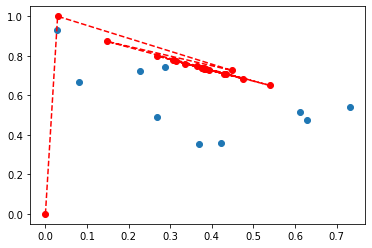

In [171]:
plt.scatter(x[:,0], x[:,1])
plt.plot(res[:20,0], res[:20,1], 'ro--')
plt.show()

Here, we clearly see a convergence to a point in the convex hull (2.).

In [172]:
def distances(x_k, x):
    return sorted([np.linalg.norm(x_k-x_i) for x_i in x])

distances(res[-1],x)

[0.09289283843687297,
 0.15387254133259975,
 0.26892457106073686,
 0.30705638727355505,
 0.3189365222057771,
 0.3604248975835644,
 0.38081232901612205,
 0.3849890862296653,
 0.4027934830941295,
 0.40299348308612615]

Here we see the list of distances between the convergence point and the neighbors (sorted for an easier understanding). We clearly see that some distances are very close.

To illustrate the fourth property, we will take some points in the border of a ball.

Clearly we see a convergence to its center.

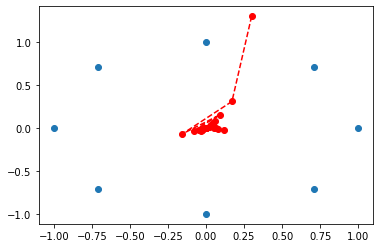

In [180]:
x = np.array([[0,1], [1,0], [-1,0], [0,-1], [np.sqrt(2)/2, np.sqrt(2)/2], [-np.sqrt(2)/2, np.sqrt(2)/2], 
              [np.sqrt(2)/2, -np.sqrt(2)/2], [-np.sqrt(2)/2, -np.sqrt(2)/2]])
x_0 = np.array([0.3, 1.3])

res=non_smooth(x, x_0)

plt.scatter(x[:,0], x[:,1])
plt.plot(res[:30,0], res[:30,1], 'ro--')
plt.show()

For the last we will take points in a ball first answering the $2R$ condition, than not.

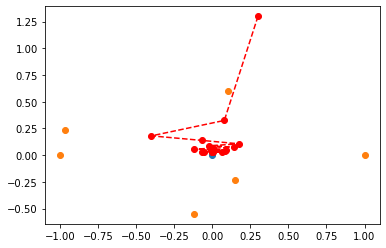

In [185]:
#Condition fulfilled it converges to (0,0)
x = np.array([[0.1,0.6], [0.15,-0.23], [-0.97,0.24], [-0.12,-0.55], [1,0], [-1,0]])
x_0 = np.array([0.3, 1.3])

res=non_smooth(x, x_0)

plt.scatter([0], [0])
plt.scatter(x[:,0], x[:,1])
plt.plot(res[:20,0], res[:20,1], 'ro--')
plt.show()

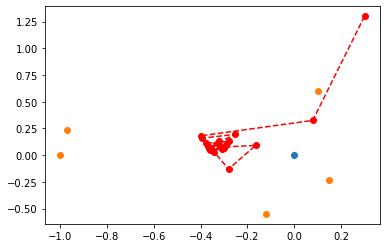

In [187]:
#We take out one point so the condition is not reached 
x = np.array([[0.1,0.6], [0.15,-0.23], [-0.97,0.24], [-0.12,-0.55], [-1,0]])
x_0 = np.array([0.3, 1.3])

res=non_smooth(x, x_0)

plt.scatter([0], [0])
plt.scatter(x[:,0], x[:,1])
plt.plot(res[:20,0], res[:20,1], 'ro--')
plt.show()

Aurèle Bohbot & Lucien Walewski